Netflix Project 

Two Library Used for this project Pandas and Matplotlib

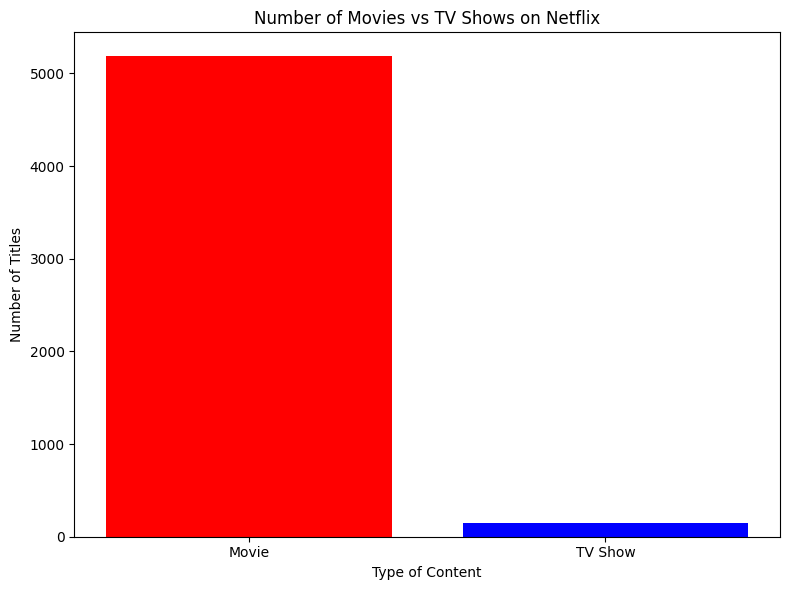

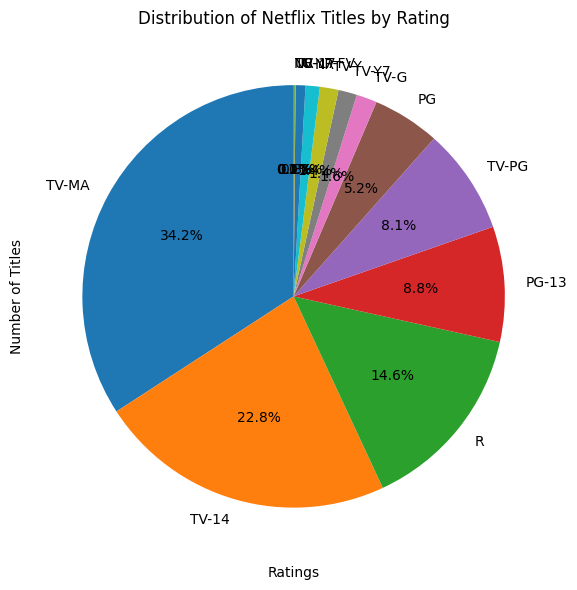

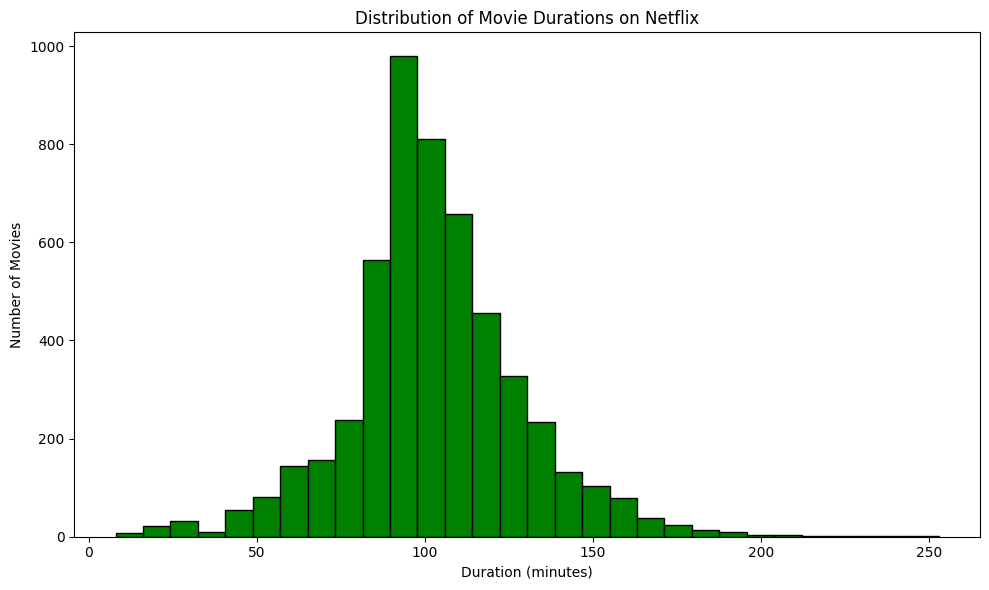

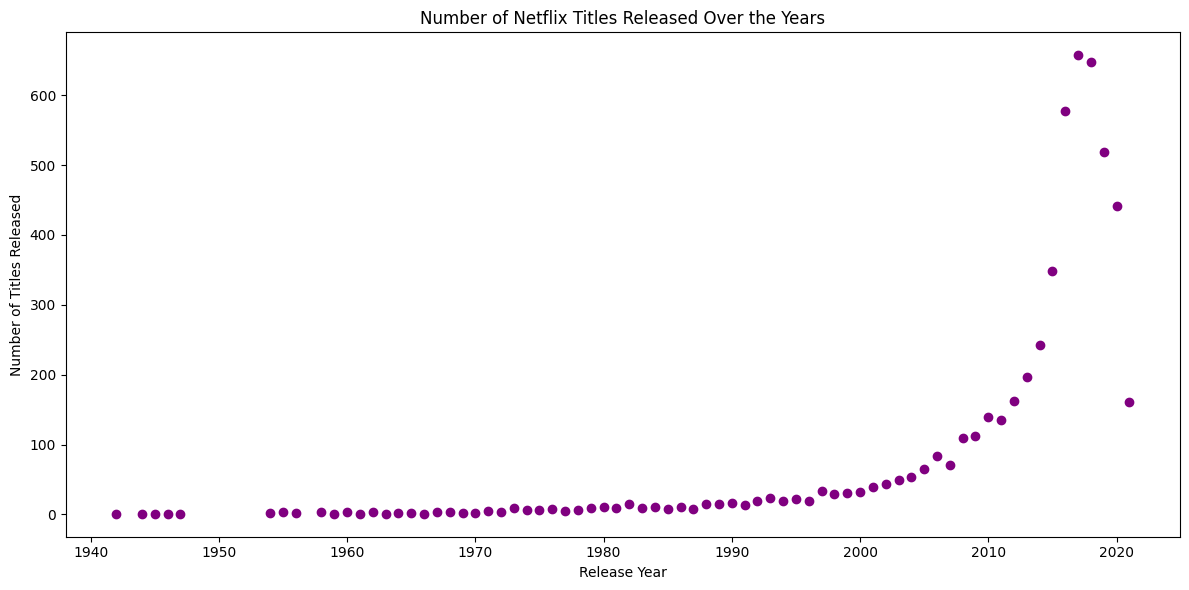

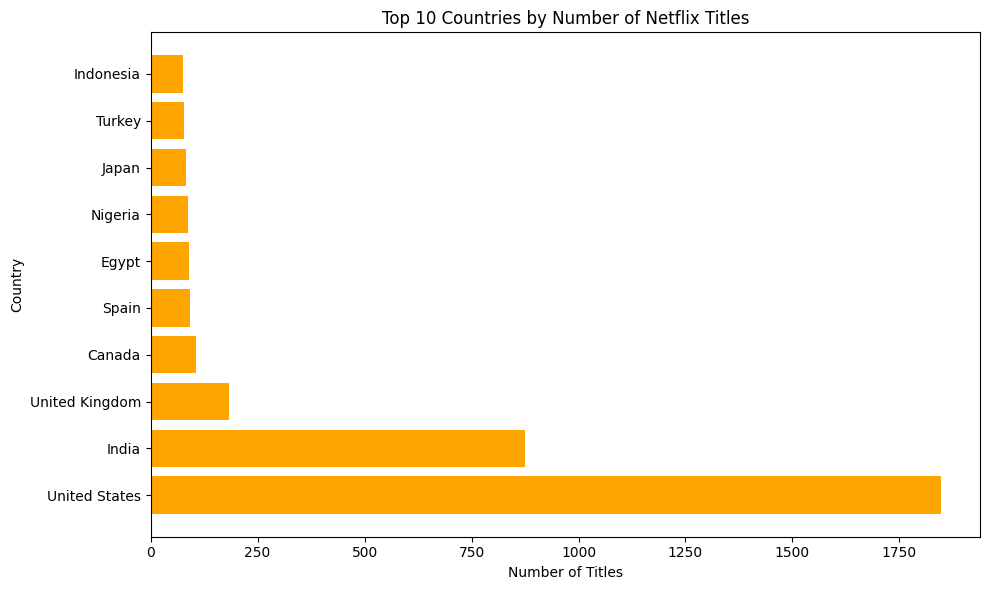

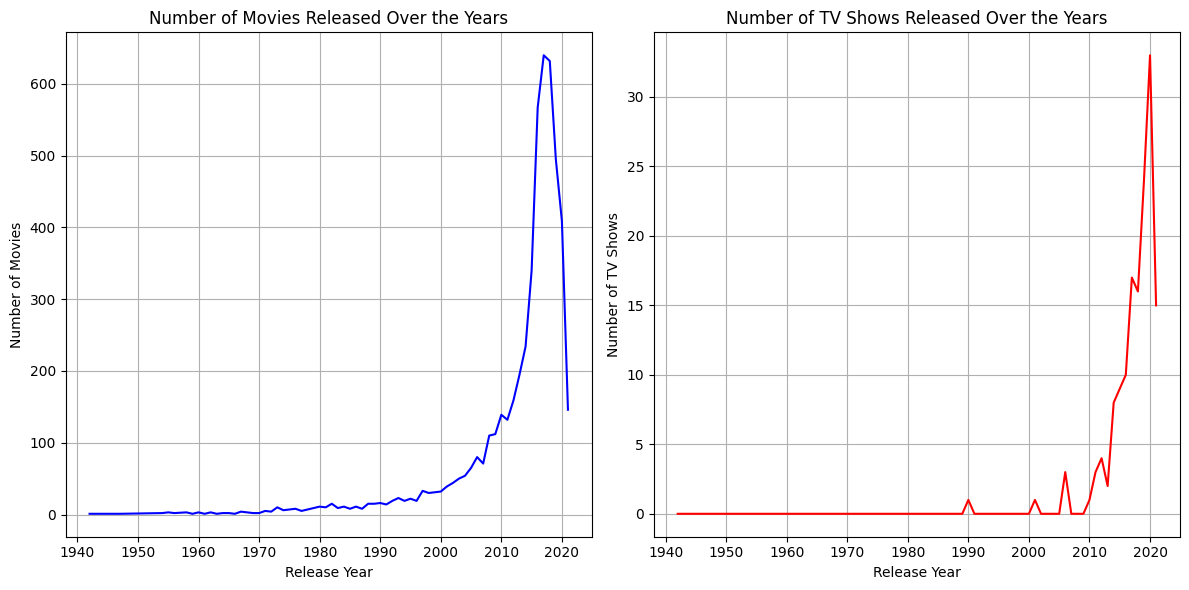

In [11]:
# Importing the Library 

import pandas as pd 
import matplotlib.pyplot as plt 

# load the data 

df = pd.read_csv('netflix_titles.csv') 

# clean the data 
df.head()
df = df.dropna(subset=['show_id','title','director','cast','country','release_year','rating','duration','listed_in','description','date_added', 'type'])

type_count = df['type'].value_counts()

# plot the data

plt.figure(figsize=(8,6))
plt.bar(type_count.index, type_count.values, color=['red', 'blue'])
plt.xlabel('Type of Content')
plt.ylabel('Number of Titles')
plt.title('Number of Movies vs TV Shows on Netflix')
plt.tight_layout()
plt.savefig('netflix_content_type_distribution.png')
plt.show()

# plot Data 
rating_counts = df['rating'].value_counts()
plt.figure(figsize=(10,6))
plt.pie(rating_counts.values, labels=rating_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Netflix Titles by Rating')
plt.xlabel('Ratings')
plt.ylabel('Number of Titles')
plt.tight_layout()
plt.savefig('netflix_rating_distribution.png')
plt.show()


movie_data = df[df['type'] == 'Movie'].copy()
movie_data['duration'] = movie_data['duration'].str.replace(' min', '').astype(int)

plt.figure(figsize=(10,6))
plt.hist(movie_data['duration'], bins=30, color='green', edgecolor='black')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movie Durations on Netflix')
plt.tight_layout()
plt.savefig('netflix_movie_duration_distribution.png')
plt.show()


release_year = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(12,6))
plt.scatter(release_year.index, release_year.values, color='purple')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles Released')
plt.title('Number of Netflix Titles Released Over the Years')
plt.tight_layout()
plt.savefig('netflix_titles_over_years.png')
plt.show()


country_couts = df['country'].value_counts().head(10)
plt.figure(figsize=(10,6))
plt.barh(country_couts.index, country_couts.values, color='orange')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.title('Top 10 Countries by Number of Netflix Titles')
plt.tight_layout()
plt.savefig('netflix_top_countries.png')
plt.show()


content_by_years = df.groupby(['release_year', 'type']).size().unstack().fillna(0)

fig, ax = plt.subplots(1,2, figsize=(12,6))

ax[0].plot(content_by_years.index, content_by_years['Movie'], color='blue')
ax[0].set_title('Number of Movies Released Over the Years')
ax[0].set_xlabel('Release Year')
ax[0].set_ylabel('Number of Movies')
ax[0].grid()
ax[1].plot(content_by_years.index, content_by_years['TV Show'], color='red')
ax[1].set_title('Number of TV Shows Released Over the Years')
ax[1].set_xlabel('Release Year')
ax[1].set_ylabel('Number of TV Shows')
ax[1].grid()
plt.tight_layout()
plt.savefig('netflix_movies_tvshows_over_years.png')
plt.show()


